# Escaping from the Universe

## Modules & Constants

*Make sure to run this cell, as we'll make use of the following throughout the day:*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
g = 9.8 # gravitational acceleration on Earth in m/s^2
c = 299792458 # speed of light in m/s
G = 6.67 * 10**-11 # universal gravitational constant in m^3/kg/s^2
M_Earth = 5.97 * 10**24 # mass of earth in kg
R_Earth = 6378000 # radius of earth in m
M_Sun = 1.989 * 10**30 # mass of sun in kg
R_Sun = 695700000 # radius of sun in m

## Functions from earlier

*Make sure to run this cell, as we'll make use of the following throughout the day:*

In [2]:
def a_Newton(M, d):
  '''
  Input M: Mass of a gravitating body
  Input d: Distance from an object to the center of the body
  Output: Gravitational acceleration of the object, according to Newton
  '''
  return -G*M/d**2

num_steps = 10000
def heights_Newton(M, R, y_i, v_i, t_end):
  '''
  Input M: Mass of gravitating body in kg
  Input R: Radius of gravitating body in m
  Input y_i: Initial height of object above the body's surface in m
  Input v_i: Initial velocity of body in m/s
  Input t_end: See description of output
  Output: An array of heights as a function of time, between t=0 and t=t_end
  '''
  heights = np.zeros(num_steps)
  heights[0] = y_i
  vels = np.zeros(num_steps)
  vels[0] = v_i
  dt = t_end/(num_steps-1)
  for i in range(1, num_steps):
    heights[i] = heights[i-1] + vels[i-1]*dt
    vels[i] = vels[i-1] + a_Newton(M, R+heights[i-1])*dt
  return heights

def v_esc(M, R):
  '''
  Input M: Mass of gravitating body in kg
  Input R: Radius of gravitating body in m (assuming launched from surface)
  Output: Minimum velocity needed to escape the body forever, in m/s
  '''
  return np.sqrt(2*G*M/R)

def a_fuel(t, MFER=0.01, v_fuel = 100, frac_fuel = 0.5):
  '''
  Input t: Time since launch of rocket (in seconds)
  Optional Input MFER: Mass fraction ejection rate of rocket (per second)
  Optional Input v_fuel: Speed of ejected fuel relative to rocket (in m/s)
  Optional Input frac_fuel: Fraction of initial mass that can be ejected as fuel (must be between 0 and 1)
  Output: Acceleration of the rocket from burning fuel at time t (in m/s^2)
  '''
  F_frac = MFER  * v_fuel
  m_frac = 1 - MFER * t
  a = F_frac / m_frac
  a = a * (m_frac > (1 - frac_fuel))
  return a

def heights_rocket(M, R, y_i, v_i, t_end, MFER=0.01, v_fuel = 100, frac_fuel = 0.5):
  '''
  Input M: Mass of gravitating body in kg
  Input R: Radius of gravitating body in m
  Input y_i: Initial height of object in m
  Input v_i: Initial velocity of object in m/s
  Input t_end: See description of output
  Optional Input MFER: Mass fraction ejection rate of rocket (per second)
  Optional Input v_fuel: Speed of ejected fuel relative to rocket (in m/s)
  Optional Input frac_fuel: Fraction of initial mass that can be ejected as fuel (must be between 0 and 1)
  Output: An array of heights as a function of time, between t=0 and t=t_end
  '''
  heights = np.zeros(num_steps) # This is a (currently empty) list of heights
  heights[0] = y_i
  vels = np.zeros(num_steps) # This is a (currently empty) list of velocities
  vels[0] = v_i
  dt = t_end/(num_steps-1) # length of time step to use in the simulation
  for i in range(1, num_steps):
    heights[i] = heights[i-1] + vels[i-1]*dt # use the velocity to determine the height at next time step
    vels[i] = vels[i-1] + a_Newton(M, R+heights[i-1])*dt + a_fuel(dt*i, MFER, v_fuel, frac_fuel)*dt
  return heights

## Escaping from an asteroid

*Pick an every-day projectile of your choice. It can be a pitcher throwing a baseball, an archer shooting an arrow, or any other scenario you're curious about. What's a typical initial height and speed of this projectile? Define a variable below for each.*

In [3]:
y_bowl = 0.5
v_bowl = 7.5
y_giant = 60
v_giant = 60
y_baseball = 1
v_baseball = 20
y_rugby = 1.5
v_rugby = 30
y_javelin = 2.2
v_javelin = 10

*The smallest asteroid observed to date has a radius of approximately 2 meters, and I estimate its mass is probably around 10,000 kg. Define a variable below for each. (Can you see where this is going?)*

In [4]:
R_Ast = 2
M_Ast = 10000

*If the projectile you chose is launched from the surface of this asteroid, will it fall back or escape its gravitational pull for good? Use the ```v_esc``` function to make a prediction.*

In [5]:
print(v_esc(M_Ast, R_Ast))

0.0008167006795638167


Projectiles will all escape

*Check your prediction by calculating and plotting the trajectory of your projectile with the ```heights_Newton``` function.*

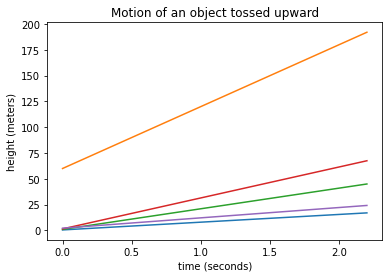

In [6]:
t_end = 2.2 # Value çhosen to match yesterday's plot
times = np.linspace(0, t_end, num_steps) # This is the list of times at which we want to find the height
heights1 = heights_Newton(M_Ast, R_Ast, y_bowl, v_bowl, t_end) # This gives the list of heights
heights2 = heights_Newton(M_Ast, R_Ast, y_giant, v_giant, t_end) # This gives the list of heights
heights3 = heights_Newton(M_Ast, R_Ast, y_baseball, v_baseball, t_end) # This gives the list of heights
heights4 = heights_Newton(M_Ast, R_Ast, y_rugby, v_rugby, t_end) # This gives the list of heights
heights5 = heights_Newton(M_Ast, R_Ast, y_javelin, v_javelin, t_end) # This gives the list of heights

plt.plot(times, heights1)
plt.plot(times, heights2)
plt.plot(times, heights3)
plt.plot(times, heights4)
plt.plot(times, heights5)
plt.xlabel("time (seconds)")
plt.ylabel("height (meters)")
plt.title("Motion of an object tossed upward")
plt.show()

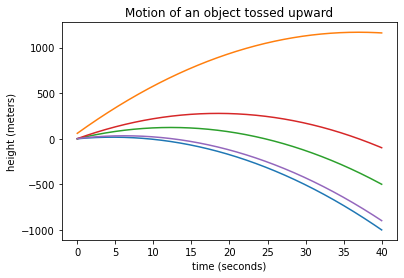

In [7]:
M_Moon = 7.35 * 10**22
R_Moon = 1.737 * 10**6
t_end = 40 # Value çhosen to match yesterday's plot
times = np.linspace(0, t_end, num_steps) # This is the list of times at which we want to find the height
heights1 = heights_Newton(M_Moon, R_Moon, y_bowl, v_bowl, t_end) # This gives the list of heights
heights2 = heights_Newton(M_Moon, R_Moon, y_giant, v_giant, t_end) # This gives the list of heights
heights3 = heights_Newton(M_Moon, R_Moon, y_baseball, v_baseball, t_end) # This gives the list of heights
heights4 = heights_Newton(M_Moon, R_Moon, y_rugby, v_rugby, t_end) # This gives the list of heights
heights5 = heights_Newton(M_Moon, R_Moon, y_javelin, v_javelin, t_end) # This gives the list of heights

plt.plot(times, heights1)
plt.plot(times, heights2)
plt.plot(times, heights3)
plt.plot(times, heights4)
plt.plot(times, heights5)
plt.xlabel("time (seconds)")
plt.ylabel("height (meters)")
plt.title("Motion of an object tossed upward")
plt.show()

## Escaping from the Moon

*The Moon has a mass of $7.35 \times 10^{22}$ kg and a radius of about $1.737  \times 10^6$ m. Store these values in appropriate variables below.*

In [8]:
M_Moon = 7.35 * 10**22
R_Moon = 1.737 * 10**6

*We're going to try to escape from the Moon using a rocket whose fuel has the following properties: ```MFER=0.04``` and ```v_fuel = 1000```. Calculate and plot the heights of this rocket below to determine what the **lowest** possible value is for ```frac_fuel``` that will still allow the rocket to escape. Assume that the initial height and velocity of the rocket are both zero.*

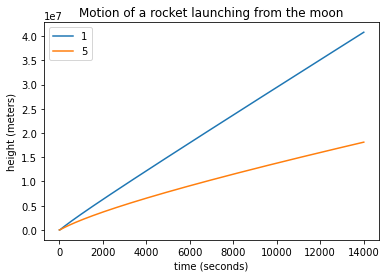

In [9]:
t_end = 14000 # Value çhosen to match yesterday's plot
times = np.linspace(0, t_end, num_steps) # This is the list of times at which we want to find the height
heights1 = heights_rocket(M_Moon, R_Moon, 0, 0, t_end,0.04,1000, frac_fuel=0.96) # This gives the list of heights
heights2 = heights_rocket(M_Moon, R_Moon, 0, 0, t_end,0.04,1000, frac_fuel=0.83) # This gives the list of heights
heights3 = heights_rocket(M_Moon, R_Moon, 0, 0, t_end,0.04,1000, frac_fuel=0.05) # This gives the list of heights
heights4 = heights_rocket(M_Moon, R_Moon, 0, 0, t_end,0.04,1000, frac_fuel=0.67) # This gives the list of heights
heights5 = heights_rocket(M_Moon, R_Moon, 0, 0, t_end,0.04,1000, frac_fuel=0.9) # This gives the list of heights

plt.plot(times, heights1, label="1")
#plt.plot(times, heights2, label="2")
#plt.plot(times, heights3, label="3")
#plt.plot(times, heights4, label="4")
plt.plot(times, heights5, label="5")
plt.xlabel("time (seconds)")
plt.ylabel("height (meters)")
plt.legend()
plt.title("Motion of a rocket launching from the moon")
plt.show()

## Escaping from the Sun

*The Sun is hundreds of thousands of times heavier than the Earth, making it difficult for even the most powerful rockets to escape its gravitational pull. But the fact that the sun shines means that at least one thing can definitely escape its gravity: light. Light simply travels so quickly that gravity doesn't have enough time to pull it back! Plot the motion of the light emitted from the Sun's surface in the code cell below.*

*Hint: At the beginning of this notebook, we have already defined some useful variables, including ```M_Sun```, ```R_Sun```, and ```c```.*

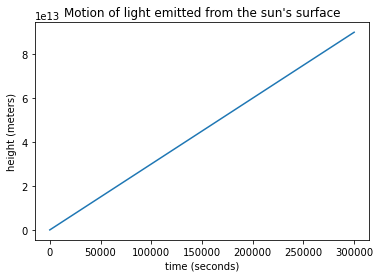

In [10]:
t_end = 300000 # Value çhosen to match yesterday's plot
times = np.linspace(0, t_end, num_steps) # This is the list of times at which we want to find the height
heights = heights_Newton(M_Sun, R_Sun, 0, c, t_end) # This gives the list of heights
plt.plot(times, heights)
plt.xlabel("time (seconds)")
plt.ylabel("height (meters)")
plt.title("Motion of light emitted from the sun's surface")
plt.savefig("escapeSun.jpg", dpi=400)
plt.show()



## Dark Stars

*We just saw that even though the Sun is extremely massive, its gravity is still not strong enough to prevent light from escaping. One reason for this is that the Sun has a very large radius, which weakens the strength of gravity at its surface (because ```d``` is in the denominator when calculating ```a_Newton```). Let's **compress** the mass of the Sun into a much smaller radius, making its gravity so strong that not even light can escape.*

*Do you remember the equation for escape velocity? You'll see in the function ```v_esc``` that it's given by the following formula:*

$v_\text{esc} = \sqrt{\frac{2GM}{R}}$.

*We want to find a new radius $R$ that will make $v_\text{esc} > c$ when $M = M_\text{sun}$. That would mean that even going at the speed of light $c$ is not fast enough to escape. Using algebra (not code), find the maximum such radius in terms of $c$, $G$, and $M_\text{sun}$. Then use the code cell below to calculate the value of that radius in meters.*

In [11]:
R_Max = 2*G*M_Sun/c**2
R_Dark = 0.99*R_Max

*Let's check that your answer was correct. Choose a value of $R$ that's slightly lower than the maximum value you calculated, and store it in a variable in the code cell below. Then, using that value of $R$, plot the motion of a beam of light emitted from the surface of a Dark Star according to Newtonian gravity.*

*Note: For this code to run properly, we need to increase the precision of our simulation; this is done for you below.*

In [12]:
num_steps = 1000000 # Increases precision of height-calculating code

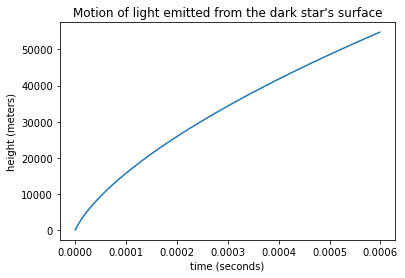

In [13]:
t_end = 3*10**-3.7 # Value çhosen to match yesterday's plot
times = np.linspace(0, t_end, num_steps) # This is the list of times at which we want to find the height
heights = heights_Newton(M_Sun, R_Dark, 0, c, t_end) # This gives the list of heights
plt.plot(times, heights)
plt.xlabel("time (seconds)")
plt.ylabel("height (meters)")
plt.title("Motion of light emitted from the dark star's surface")
plt.savefig("escapeBlackhole.jpg", dpi=400)
plt.show()

*It would seem that we've just found an object from which nothing could escape - not even light! But we've assumed that the only force at play is gravity. What if we launched something with a magical engine that allowed it to maintain its speed forever? In the code cell below, define a function called ```heights_magic``` that is similar to ```heights_Newton``` but assumes the object's velocity never changes (i.e., the acceleration is always zero).*

In [14]:
def heights_magic(M, R, y_i, v_i, t_end):
  '''
  Input M: Mass of gravitating body in kg
  Input R: Radius of gravitating body in m
  Input y_i: Initial height of object above the body's surface in m
  Input v_i: Initial velocity of body in m/s
  Input t_end: See description of output
  Output: An array of heights as a function of time, between t=0 and t=t_end
  '''
  heights = np.zeros(num_steps)
  heights[0] = y_i
  vels = np.zeros(num_steps)
  vels[0] = v_i
  dt = t_end/(num_steps-1)
  for i in range(1, num_steps):
    heights[i] = heights[i-1] + vels[i-1]*dt
    vels[i] = vels[i-1]
  return heights

*Now, use the new ```heights_magic``` function to plot what happens when an object is emitted from the surface of our Dark Star at the speed of light and is allowed to maintain that speed. You should see that with such an engine, it really can escape!*

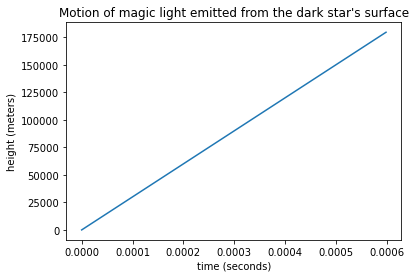

In [15]:
t_end = 3*10**-3.7 # Value çhosen to match yesterday's plot
times = np.linspace(0, t_end, num_steps) # This is the list of times at which we want to find the height
heights = heights_magic(M_Sun, R_Dark, 0, c, t_end) # This gives the list of heights
plt.plot(times, heights)
plt.xlabel("time (seconds)")
plt.ylabel("height (meters)")
plt.title("Motion of magic light emitted from the dark star's surface")
plt.show()

## Bonus: Black Holes

*Earlier in the week, we learned that Newtonian gravity improved upon Galilean gravity, which was only approximately correct near the surface of the Earth. In the 20th century, Einstein further improved upon Newtonian gravity, proving that Newton's version was only approximately correct when gravity was much weaker than the Dark Star's gravitational pull.*

*Einstein's gravity is a bit too complicated to get into here, but the code below is meant to plot the motion of an object that always travels at the speed of light, just like you plotted above for Newtonian gravity. Fill in the code cell where needed to see how Einstein's predictions differ from Newton's.*

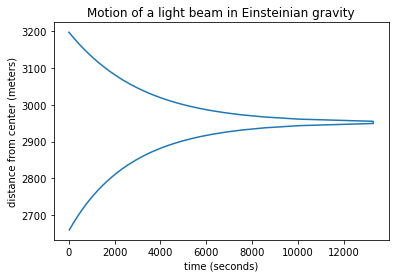

In [16]:
def t_in(r0, r, M):
  m = G*M/c**2
  time = -r + r0 - 2*m*np.log(abs(r-2*m)) + 2*m*np.log(abs(r0-2*m))
  time = time * (time > 0)
  time[time==0] = np.nan
  return time

R_max = 2*G*M_Sun/c**2
r0 = 0.9 * R_Max

rs = np.linspace(0, 2*R_max, 1000)
times = t_in(r0, rs, M_Sun)
plt.plot(times, rs)
plt.xlabel("time (seconds)")
plt.ylabel("distance from center (meters)")
plt.title("Motion of a light beam in Einsteinian gravity")
plt.savefig("escapeBlackholeEinsteinian.jpg", dpi=400)
plt.show()

*The trajectory you see is really, REALLY weird. Here's how to interpret the motion of the light beam we've just plotted. It starts out at $t = 0$ at some large distance $d$, far from the center of the Dark Star. Then over time, it's distance decreases, until it reaches a cusp where---no joke---the variable $t$ begins to DECREASE as the light beam continues to fall in toward smaller distances $d$. At this cusp, $t$ fundamentally switches nature from being the time experienced by the light beam, to being a regular spatial dimension, while $d$ becomes the time dimension, and the "future" direction points toward decreasing $d$. Sounds like sci-fi, but that's currently our best-tested description of reality. You should notice, by the way, that this cusp occurs precisely at the value of $R_\text{max}$ that you calculated.*

*You might say, "Hold on, this light beam started out falling in toward the Dark Star in this plot. I wanted to see what happens when the light beam is shot outward, from the surface!" Except... when the gravity is this strong, there is no outward. Literally. The equations tell you that light, and any object traveling slower than light, fundamentally cannot go outward, in the same way that you or I on Earth can't go backward in time. This feature makes Dark Stars very different in Einstein's gravity than they were in Newtonian gravity, and for that reason, we give them a whole new name: Black Holes.*



*Let's answer a bit of a side question that is relevant to the previous discussion: Why can't objects just go faster than light? The answer comes again from Einstein, whose theory of relativity gives us the following relation between speed, energy, and mass:*

$v = c \cdot \frac{\sqrt{(E/c^2)^2 - m^2}}{E/c^2}$

*Code up a function that gives $v$ from inputs $E$ and $m$ below:*

In [17]:
def v(E, m):

  return c * np.sqrt(((E/c**2)**2 - m**2))/ (E/ c**2)

*Now let's say we have a ball with mass ```m_ball``` = 1 kg. Encode this value in a variable below:*

In [18]:
m_ball = 1 # in kg

*Make a numpy array of energies ranging from the smallest value $m_\text{ball}c^2$ to the largest value $5m_\text{ball}c^2$ whose length is 1000:*

In [19]:
energies = np.linspace(m_ball*c**2, 5*m_ball*c**2, 1000)

*Finally, calculate the array of velocities corresponding to this array of energies for our ball. Plot the velocities as a function of energy given to the ball. In a comment, describe why it's physically impossible to make the ball's velocity as high as we want, specifically higher than the speed of light.*

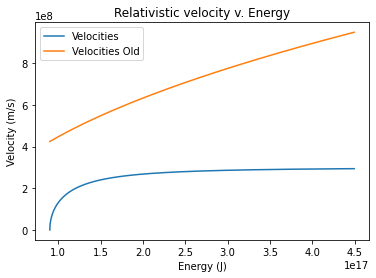

In [20]:
def v_old(E, m):
  return np.sqrt(2*E/m)

velocities = v(energies ,m_ball)
vel_old = v_old(energies, m_ball)

plt.plot(energies, velocities, label="Velocities")
plt.plot(energies, vel_old, label="Velocities Old")
plt.legend()
plt.xlabel("Energy (J)")
plt.ylabel("Velocity (m/s)")
plt.title("Relativistic velocity v. Energy")
plt.show()

In [21]:
R_Max = 2*G*M_Sun/c**2
R_Sun = 695700000 # radius of sun in m


print((R_Max/R_Sun) * 100)

0.00042435292836402527
